In [10]:
import pandas as pd
import numpy as np
import json
from datetime import date
import calendar
import networkx as nx


TS=date(2020,9,1)
TE=date(2020,11,1)




dic_month={"Jan":1,"Feb":2,"Mar":3,"Apr":4,"May":5,"Jun":6,"Jul":7,"Aug":8,"Sep":9,"Oct":10,"Nov":11,"Dec":12}
# df2=pd.read_excel("INDIA.XLSX")
# dic={}
# df2
# df2=df2.loc[(df2['Unnamed: 5'] == "All ages") & (df2["Unnamed: 4"]=="Total")& (df2["Unnamed: 6"]=="Total")]
# df2
# for index, row in df2.iterrows():
#     dic[row["Unnamed: 3"].lstrip("State -")[0:-5].upper()]=row["Unnamed: 7"]
# dic.pop("")
# #dic THIS THING ABOVE MAKES A DICT OF MIGRATION, LETS CHANGE IT TO POPULATION
# dic["DELHI NCT"]=dic["NCT OF DELHI"]
# dic["JAMMU AND KASHMIR"]=dic["JAMMU & KASHMIR"]
# dic["SIKKIM"]=dic["IKKIM"]
# dic.pop("IKKIM")
# dic.pop("JAMMU & KASHMIR")
# dic.pop("NCT OF DELHI")
# dic


df2=pd.read_excel("INDIA.XLSX")
dic={}
df2
df2=df2.loc[(df2['Unnamed: 5'] == "All ages") & (df2["Unnamed: 4"]=="Total")& (df2["Unnamed: 6"]=="Total")]
df2
for index, row in df2.iterrows():
    dic[row["Unnamed: 3"].lstrip("State -").upper()]=row["Unnamed: 7"]

dic
dic["DELHI NCT"]=dic["DELHI"]
                            # dic["JAMMU AND KASHMIR"]=dic["JAMMU & KASHMIR"]
                            # #dic["SIKKIM"]=dic["IKKIM"]
                            # #dic.pop("IKKIM")
dic.pop("DELHI")
print(dic)



df=pd.read_csv("Scraped.csv")
x=df["5"][6]
print(x)
df
passengers=[]
for i in range(len(df)):
    temp=0
    x=df["18"][i]
    x=x.replace("EOG","")
    #x=x.strip('][').split(',')
    if(len(x)>8):
        for j in x:
            if (j.startswith("D")):
                temp+=106
            if (j.startswith("H")):
                temp+=22
            if (j.startswith("B")):
                temp+=72
            if (j.startswith("S") or j.startswith("C")):
                temp+=80
            if (j.startswith("A") or j.startswith("E")):
                temp+=54
        if temp==0:
            print(x)
            y=x
        passengers.append(temp)
passengers=list(filter(lambda a: a != 0, passengers))


def df_states(df):
    for i in range(len(df)):
        x=df["19"][i]
        x=x.strip('][').split(',')
        for j in range(1,len(x),2):
            print(x[j])
#df_states(df)




def create():
    lis=[*dic]
    df=pd.DataFrame(data=0,columns=lis, index = lis)
    return df
dfG=create()
def get_passengers(x):
    temp=0
    x=x.replace("EOG","")
    #x=x.strip('][').split(',')
    if(len(x)>8):
        for j in x:
            if (j.startswith("D")):
                temp+=106
            if (j.startswith("H")):
                temp+=22
            if (j.startswith("B")):
                temp+=72
            if (j.startswith("S") or j.startswith("C")):
                temp+=80
            if (j.startswith("A") or j.startswith("E")):
                temp+=54
    if temp>0:
        return temp
    else:
        return 1590
def get_weekdays(string):
    string=string.replace(" ","")
    #print(len(string), string)
    return len(string)
def separator(string):
    string=string[4:]
    dm,year=string.split(",")
    return dm,year[1:]

def checkruns_weight(row):      #Assumption: The end date is not in 2022. And the start date is either in 2020 or 2021
    s=row[21]
    e=row[22]
    days=0
#     TS=date(2020,5,1)
#     TE=date(2020,7,31)
#     TS=date(2020,8,1)
#     TE=date(2020,10,31)

    print(s,e)
    try:
        s,years=separator(s)
        e,yeare=separator(e)
        #
        sm,sd=s.split(" ")
        em,ed=e.split(" ")
        #
        sm=dic_month[sm]
        em=dic_month[em]
        #
        date_s=date(int(years),int(sm),int(sd))
        date_e=date(int(yeare),int(em),int(ed))
        #
        #days=date_e-date_s
        if(TS>date_s):
            CS=TS
        else:
            CS=date_s
        if(TE>date_e):
            CE=date_e
        else:
            CE=TE
        
        days=CE-CS
        
    except Exception as e:
        print(e)
        days=date(2021,6,10)-date(2021,6,10)
#         try:
#             sm,sd=s.split(" ")
#             sm=dic_month[sm]
#             date_e=date(2021,6,10)
#             date_s=date(2021,int(sm),int(sd))
#             days=date_e-date_s
#         except:
#             days=date(2021,6,10)-date(2021,6,10)


    days=days.days
    if(days<0):
        days=0
    runs=days/7*get_weekdays(row[14])*get_passengers(row[19])
    print(days,runs)
    return runs
                #
#get_weekdays(df.loc[0][14])
#get_passengers(df.loc[1][19])
def separator(string):
    string=string[4:]
    dm,year=string.split(",")
    return dm,year[1:]
checkruns_weight(df.loc[0])


{'INDIA': 141908270, 'ANDAMAN AND NICOBAR ISLANDS': 381, 'ANDHRA PRADESH': 84581, 'ARUNACHAL PRADESH': 1384, 'ASSAM': 31206, 'BIHAR': 104099, 'CHANDIGARH': 1055, 'CHHATTISGARH': 25545, 'DADRA AND NAGAR HAVELI': 344, 'DAMAN AND DIU': 243, 'GOA': 1459, 'GUJARAT': 60440, 'HARYANA': 25351, 'HIMACHAL PRADESH': 6865, 'JAMMU AND KASHMIR': 12541, 'JHARKHAND': 32988, 'KARNATAKA': 61095, 'KERALA': 33406, 'LAKSHADWEEP': 64, 'MADHYA PRADESH': 72627, 'MAHARASHTRA': 112374, 'MANIPUR': 2856, 'MEGHALAYA': 2967, 'MIZORAM': 1097, 'NAGALAND': 1979, 'ODISHA': 41974, 'PUDUCHERRY': 1248, 'PUNJAB': 27743, 'RAJASTHAN': 68548, 'IKKIM': 611, 'TAMIL NADU': 72147, 'TRIPURA': 3674, 'UTTAR PRADESH': 199812, 'UTTARAKHAND': 10086, 'WEST BENGAL': 91276, 'DELHI NCT': 16788}
Jul 01
['  L', '', ' G1', ' G2', ' G3', ' G4', ' G5', ' G6', ' G7', ' G8', ' G9', 'G10', 'G11', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18', '']
['  L', '', 'G18', 'G17', 'G16', 'G15', 'G14', 'G13', 'G12', 'G11', 'G10', ' G9', ' G8', ' G7', ' G6

0.0

['KERALA', 'TAMIL NADU', 'ANDHRA PRADESH', 'TELANGANA', 'MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH']
Mon Jun 21, 2021 Thu Jul 01, 2021
0 0.0
['HARYANA', 'CHANDIGARH', 'DELHI NCT']
Mon Jun 21, 2021 nan
'float' object is not subscriptable
0 0.0
['DELHI NCT', 'HARYANA', 'CHANDIGARH']
Mon Jun 21, 2021 nan
'float' object is not subscriptable
0 0.0
['PUNJAB', 'HARYANA', 'DELHI NCT']
Fri Jul 02, 2021 nan
'float' object is not subscriptable
0 0.0
['DELHI NCT', 'HARYANA', 'PUNJAB']
Fri Jul 02, 2021 nan
'float' object is not subscriptable
0 0.0
['DELHI NCT', 'HARYANA', 'PUNJAB', 'JAMMU AND KASHMIR']
Fri Jul 02, 2021 nan
'float' object is not subscriptable
0 0.0
['JAMMU AND KASHMIR', 'PUNJAB', 'HARYANA', 'DELHI NCT']
Thu Jul 01, 2021 nan
'float' object is not subscriptable
0 0.0
['RAJASTHAN', 'UTTAR PRADESH', 'BIHAR', 'WEST BENGAL', 'ASSAM']
Sun Jul 04, 2021 nan
'float' object is not subscriptable
0 0.0
['ASSAM', 'WEST BENGAL', 'BIHAR', 'UTTAR PRADESH', 'RAJASTHAN']
Thu Jul 01, 2021 nan
'flo

['BIHAR']
Wed Jun 16, 2021 nan
'float' object is not subscriptable
0 0.0
['ASSAM', 'WEST BENGAL', 'BIHAR', 'JHARKHAND']
Tue Jun 29, 2021 nan
'float' object is not subscriptable
0 0.0
['WEST BENGAL', 'JHARKHAND', 'BIHAR', 'UTTAR PRADESH', 'DELHI NCT']
Mon Jun 14, 2021 Tue Jun 29, 2021
0 0.0
['DELHI NCT', 'UTTAR PRADESH', 'BIHAR', 'JHARKHAND', 'WEST BENGAL']
Tue Jun 15, 2021 Wed Jun 30, 2021
0 0.0
['ODISHA', 'WEST BENGAL', 'BIHAR', 'ASSAM']
Sat Jun 26, 2021 nan
'float' object is not subscriptable
0 0.0
['DELHI NCT', 'UTTAR PRADESH', 'BIHAR', 'JHARKHAND', 'WEST BENGAL']
Sun Jun 13, 2021 nan
'float' object is not subscriptable
0 0.0
['DELHI NCT', 'UTTAR PRADESH', 'BIHAR']
Mon Jun 14, 2021 nan
'float' object is not subscriptable
0 0.0
['MAHARASHTRA', 'GOA']
Sun Oct 25, 2020 Mon Nov 01, 2021
0 0.0
['ASSAM', 'WEST BENGAL', 'BIHAR', 'ODISHA', 'ANDHRA PRADESH', 'TELANGANA']
Wed May 12, 2021 Fri Jun 18, 2021
0 0.0
['ASSAM', 'WEST BENGAL', 'BIHAR', 'UTTAR PRADESH', 'RAJASTHAN', 'MADHYA PRADESH', 

0 0.0
['UTTAR PRADESH']
Mon Jun 14, 2021 nan
'float' object is not subscriptable
0 0.0
['UTTAR PRADESH']
Sun Jun 13, 2021 nan
'float' object is not subscriptable
0 0.0
['UTTARAKHAND', 'UTTAR PRADESH']
Fri Jun 11, 2021 nan
'float' object is not subscriptable
0 0.0
['UTTARAKHAND', 'UTTAR PRADESH']
Fri Jun 11, 2021 nan
'float' object is not subscriptable
0 0.0
['KARNATAKA', 'TAMIL NADU', 'ANDHRA PRADESH', 'TELANGANA', 'MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH', 'BIHAR']
Sun Jun 13, 2021 nan
'float' object is not subscriptable
0 0.0
['BIHAR', 'UTTAR PRADESH', 'MADHYA PRADESH', 'MAHARASHTRA', 'TELANGANA', 'ANDHRA PRADESH', 'TAMIL NADU', 'KARNATAKA']
Thu Jun 10, 2021 nan
'float' object is not subscriptable
0 0.0
['GUJARAT', 'RAJASTHAN', 'UTTAR PRADESH', 'BIHAR']
Sat Jun 12, 2021 Mon Jun 28, 2021
0 0.0
['BIHAR', 'UTTAR PRADESH', 'RAJASTHAN', 'GUJARAT']
Thu Jun 10, 2021 Sat Jun 26, 2021
0 0.0
['BIHAR', 'JHARKHAND', 'WEST BENGAL']
Tue Jun 15, 2021 Wed Jun 30, 2021
0 0.0
['WEST BENGAL', 'J

['BIHAR', 'UTTAR PRADESH', 'RAJASTHAN', 'MADHYA PRADESH', 'GUJARAT']
Tue Apr 20, 2021 Thu May 27, 2021
0 0.0
['GUJARAT', 'MADHYA PRADESH', 'RAJASTHAN', 'UTTAR PRADESH', 'BIHAR']
Mon Apr 19, 2021 Tue May 25, 2021
0 0.0
['UTTAR PRADESH', 'RAJASTHAN', 'MADHYA PRADESH', 'GUJARAT']
Tue Apr 20, 2021 Wed May 26, 2021
0 0.0
['GUJARAT', 'MADHYA PRADESH', 'RAJASTHAN', 'UTTAR PRADESH']
Mon Apr 19, 2021 Tue May 25, 2021
0 0.0
['KARNATAKA', 'TAMIL NADU', 'ANDHRA PRADESH', 'ODISHA', 'WEST BENGAL', 'JHARKHAND', 'BIHAR']
Sat May 15, 2021 Sun May 16, 2021
0 0.0
['MAHARASHTRA', 'GUJARAT', 'MADHYA PRADESH', 'RAJASTHAN', 'UTTAR PRADESH', 'BIHAR']
Tue Jun 02, 2020 Tue Jun 01, 2021
62 61149.71428571429
['BIHAR', 'UTTAR PRADESH', 'RAJASTHAN', 'MADHYA PRADESH', 'GUJARAT', 'MAHARASHTRA']
Fri Jun 05, 2020 Wed Jun 02, 2021
62 61149.71428571429
['GOA', 'KARNATAKA', 'ANDHRA PRADESH', 'TELANGANA']
Tue Apr 27, 2021 Wed Jun 30, 2021
0 0.0
['TELANGANA', 'ANDHRA PRADESH', 'KARNATAKA', 'GOA']
Sun Apr 25, 2021 Mon Jun 28

['TAMIL NADU', 'KERALA', 'ANDHRA PRADESH', 'ODISHA', 'WEST BENGAL', 'BIHAR', 'ASSAM', 'NAGALAND']
Sat Apr 24, 2021 Tue Apr 27, 2021
0 0.0
['ASSAM', 'NAGALAND', 'WEST BENGAL', 'BIHAR', 'ODISHA', 'ANDHRA PRADESH', 'TAMIL NADU', 'KERALA']
Wed Apr 28, 2021 Sat May 01, 2021
0 0.0
['BIHAR', 'UTTAR PRADESH', 'RAJASTHAN', 'MADHYA PRADESH', 'GUJARAT', 'MAHARASHTRA']
Mon Apr 26, 2021 Wed Apr 28, 2021
0 0.0
['MAHARASHTRA', 'GUJARAT', 'MADHYA PRADESH', 'RAJASTHAN', 'UTTAR PRADESH', 'BIHAR']
Sun Apr 25, 2021 Tue Apr 27, 2021
0 0.0
['MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH']
Fri Apr 23, 2021 Sat Apr 24, 2021
0 0.0
['WEST BENGAL', 'ODISHA', 'ANDHRA PRADESH', 'TAMIL NADU']
Thu Apr 29, 2021 nan
'float' object is not subscriptable
0 0.0
['UTTAR PRADESH', 'MADHYA PRADESH', 'MAHARASHTRA']
Sun Apr 18, 2021 Mon May 03, 2021
0 0.0
['MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH']
Fri Apr 16, 2021 Sun May 02, 2021
0 0.0
['MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH']
Wed Apr 21, 2021 Thu Apr 22, 20

0 0.0
['UTTAR PRADESH', 'MADHYA PRADESH', 'DELHI NCT']
Wed Oct 21, 2020 Fri Jul 02, 2021
0 0.0
['GUJARAT', 'RAJASTHAN', 'HARYANA', 'DELHI NCT', 'UTTAR PRADESH']
Tue Apr 13, 2021 nan
'float' object is not subscriptable
0 0.0
['TAMIL NADU']
Sun Apr 04, 2021 Sun Jul 04, 2021
0 0.0
['TAMIL NADU']
Sat Apr 03, 2021 Sat Jul 03, 2021
0 0.0
['BIHAR', 'UTTAR PRADESH', 'DELHI NCT']
Thu Apr 01, 2021 Thu Apr 08, 2021
0 0.0
['DELHI NCT', 'UTTAR PRADESH', 'BIHAR']
Fri Apr 02, 2021 Fri Apr 09, 2021
0 0.0
['RAJASTHAN', 'GUJARAT', 'MAHARASHTRA']
Thu Dec 03, 2020 Tue Jun 29, 2021
0 0.0
['MAHARASHTRA', 'GUJARAT', 'RAJASTHAN']
Fri Dec 04, 2020 Wed Jun 30, 2021
0 0.0
['ANDHRA PRADESH']
Wed Oct 21, 2020 Fri Jul 02, 2021
0 0.0
['BIHAR', 'UTTAR PRADESH', 'UTTARAKHAND', 'HARYANA', 'PUNJAB']
Tue Nov 10, 2020 Wed Jun 30, 2021
0 0.0
['PUNJAB', 'HARYANA', 'UTTAR PRADESH', 'UTTARAKHAND', 'BIHAR']
Thu Nov 12, 2020 Fri Jul 02, 2021
0 0.0
['BIHAR', 'UTTAR PRADESH', 'MADHYA PRADESH', 'GUJARAT']
Sun Apr 18, 2021 nan
'flo

['DELHI NCT', 'UTTAR PRADESH', 'BIHAR', 'WEST BENGAL', 'ASSAM']
Thu Oct 22, 2020 Sat Jul 03, 2021
0 0.0
['DELHI NCT', 'UTTAR PRADESH', 'BIHAR']
Sat Jan 02, 2021 Sat Jul 03, 2021
0 0.0
['BIHAR', 'UTTAR PRADESH', 'DELHI NCT']
Fri Jan 01, 2021 Fri Jul 02, 2021
0 0.0
['WEST BENGAL']
Sat Mar 20, 2021 nan
'float' object is not subscriptable
0 0.0
['WEST BENGAL']
Sat Mar 20, 2021 nan
'float' object is not subscriptable
0 0.0
['WEST BENGAL', 'JHARKHAND', 'BIHAR', 'UTTAR PRADESH']
Sat Mar 20, 2021 Thu Apr 01, 2021
0 0.0
['UTTAR PRADESH', 'BIHAR', 'JHARKHAND', 'WEST BENGAL']
Fri Mar 19, 2021 Wed Mar 31, 2021
0 0.0
['DELHI NCT', 'UTTAR PRADESH', 'BIHAR']
Fri Mar 19, 2021 Tue Mar 30, 2021
0 0.0
['BIHAR', 'UTTAR PRADESH', 'DELHI NCT']
Sat Mar 20, 2021 Wed Mar 31, 2021
0 0.0
['DELHI NCT', 'UTTAR PRADESH', 'MADHYA PRADESH', 'MAHARASHTRA']
Thu Mar 25, 2021 Fri Apr 02, 2021
0 0.0
['MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH', 'DELHI NCT']
Sat Mar 27, 2021 Sun Apr 04, 2021
0 0.0
['DELHI NCT', 'UTTAR

0 0.0
['JHARKHAND', 'BIHAR', 'UTTAR PRADESH', 'MADHYA PRADESH', 'MAHARASHTRA', 'TELANGANA']
nan nan
'float' object is not subscriptable
0 0.0
['GOA', 'MAHARASHTRA']
Sun Dec 20, 2020 Tue Apr 27, 2021
0 0.0
['WEST BENGAL', 'JHARKHAND']
nan nan
'float' object is not subscriptable
0 0.0
['MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH']
Sat Apr 24, 2021 Mon Apr 26, 2021
0 0.0
['MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH']
Fri Apr 16, 2021 Sun May 09, 2021
0 0.0
['DELHI NCT', 'HARYANA', 'RAJASTHAN', 'MADHYA PRADESH']
nan nan
'float' object is not subscriptable
0 0.0
['MADHYA PRADESH', 'RAJASTHAN', 'HARYANA', 'DELHI NCT']
nan nan
'float' object is not subscriptable
0 0.0
['BIHAR', 'JHARKHAND', 'WEST BENGAL']
nan nan
'float' object is not subscriptable
0 0.0
['UTTAR PRADESH', 'RAJASTHAN', 'MADHYA PRADESH', 'GUJARAT']
Sat Apr 17, 2021 nan
'float' object is not subscriptable
0 0.0
['TAMIL NADU', 'ANDHRA PRADESH', 'TELANGANA', 'MAHARASHTRA', 'MADHYA PRADESH', 'RAJASTHAN']
Fri Dec 25, 2020 na

['GUJARAT', 'MAHARASHTRA', 'KARNATAKA', 'TELANGANA', 'ANDHRA PRADESH', 'TAMIL NADU']
Mon May 03, 2021 Tue May 04, 2021
0 0.0
['ASSAM', 'WEST BENGAL']
Fri Dec 25, 2020 nan
'float' object is not subscriptable
0 0.0
['GUJARAT', 'MAHARASHTRA', 'CHHATTISGARH', 'ODISHA', 'JHARKHAND', 'WEST BENGAL']
Fri Apr 16, 2021 nan
'float' object is not subscriptable
0 0.0
['WEST BENGAL']
nan nan
'float' object is not subscriptable
0 0.0
['WEST BENGAL']
nan nan
'float' object is not subscriptable
0 0.0
['UTTAR PRADESH', 'DELHI NCT']
nan nan
'float' object is not subscriptable
0 0.0
['WEST BENGAL']
nan nan
'float' object is not subscriptable
0 0.0
['WEST BENGAL', 'ASSAM']
Fri Dec 25, 2020 nan
'float' object is not subscriptable
0 0.0
['WEST BENGAL', 'JHARKHAND']
nan nan
'float' object is not subscriptable
0 0.0
['WEST BENGAL', 'JHARKHAND']
nan nan
'float' object is not subscriptable
0 0.0
['MAHARASHTRA', 'CHHATTISGARH', 'ODISHA', 'JHARKHAND', 'WEST BENGAL']
Thu Apr 08, 2021 nan
'float' object is not subsc

['WEST BENGAL', 'JHARKHAND', 'ODISHA', 'CHHATTISGARH', 'MAHARASHTRA', 'GUJARAT']
nan nan
'float' object is not subscriptable
0 0.0
['MAHARASHTRA', 'KARNATAKA', 'TELANGANA', 'ANDHRA PRADESH']
nan nan
'float' object is not subscriptable
0 0.0
['MAHARASHTRA', 'KARNATAKA', 'TELANGANA']
nan nan
'float' object is not subscriptable
0 0.0
['MAHARASHTRA', 'GOA', 'KARNATAKA', 'KERALA']
nan nan
'float' object is not subscriptable
0 0.0
['TELANGANA', 'MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH', 'BIHAR']
nan nan
'float' object is not subscriptable
0 0.0
['MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH', 'BIHAR']
nan nan
'float' object is not subscriptable
0 0.0
['BIHAR', 'UTTAR PRADESH', 'MADHYA PRADESH', 'MAHARASHTRA', 'TELANGANA']
nan nan
'float' object is not subscriptable
0 0.0
['TELANGANA', 'KARNATAKA', 'ANDHRA PRADESH']
nan nan
'float' object is not subscriptable
0 0.0
['MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH']
nan nan
'float' object is not subscriptable
0 0.0
['BIHAR', 'UTTAR PR

['PUNJAB', 'HARYANA', 'UTTAR PRADESH', 'UTTARAKHAND', 'BIHAR', 'JHARKHAND']
nan nan
'float' object is not subscriptable
0 0.0
['HARYANA', 'DELHI NCT', 'UTTAR PRADESH']
nan nan
'float' object is not subscriptable
0 0.0
['UTTAR PRADESH', 'DELHI NCT']
nan nan
'float' object is not subscriptable
0 0.0
['DELHI NCT', 'UTTAR PRADESH']
nan nan
'float' object is not subscriptable
0 0.0
['MAHARASHTRA']
Sat Sep 12, 2020 Mon Apr 26, 2021
0 0.0
['MAHARASHTRA']
Sat Sep 12, 2020 Mon Apr 26, 2021
0 0.0
['MADHYA PRADESH', 'UTTAR PRADESH', 'RAJASTHAN', 'HARYANA', 'DELHI NCT']
nan nan
'float' object is not subscriptable
0 0.0
['HARYANA', 'DELHI NCT', 'UTTAR PRADESH', 'RAJASTHAN', 'MADHYA PRADESH']
nan nan
'float' object is not subscriptable
0 0.0
['PUNJAB', 'HARYANA', 'UTTAR PRADESH', 'BIHAR', 'WEST BENGAL', 'ASSAM']
nan nan
'float' object is not subscriptable
0 0.0
['ASSAM', 'WEST BENGAL', 'BIHAR', 'UTTAR PRADESH', 'HARYANA', 'PUNJAB']
nan nan
'float' object is not subscriptable
0 0.0
['JHARKHAND', 'BIH

['RAJASTHAN', 'GUJARAT', 'MAHARASHTRA', 'KARNATAKA']
nan nan
'float' object is not subscriptable
0 0.0
['KARNATAKA', 'MAHARASHTRA', 'GUJARAT', 'RAJASTHAN']
nan nan
'float' object is not subscriptable
0 0.0
['BIHAR', 'UTTAR PRADESH', 'MADHYA PRADESH', 'CHHATTISGARH']
nan nan
'float' object is not subscriptable
0 0.0
['CHHATTISGARH', 'MADHYA PRADESH', 'UTTAR PRADESH', 'BIHAR']
nan nan
'float' object is not subscriptable
0 0.0
['ANDHRA PRADESH', 'TELANGANA']
nan nan
'float' object is not subscriptable
0 0.0
['TELANGANA', 'ANDHRA PRADESH']
nan nan
'float' object is not subscriptable
0 0.0
['UTTARAKHAND', 'UTTAR PRADESH', 'DELHI NCT', 'MADHYA PRADESH', 'MAHARASHTRA']
nan nan
'float' object is not subscriptable
0 0.0
['MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH', 'DELHI NCT', 'UTTARAKHAND']
nan nan
'float' object is not subscriptable
0 0.0
['TELANGANA', 'ANDHRA PRADESH']
nan nan
'float' object is not subscriptable
0 0.0
['ANDHRA PRADESH', 'TELANGANA']
nan nan
'float' object is not subscr

['KERALA', 'TAMIL NADU', 'ANDHRA PRADESH', 'TELANGANA', 'MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH']
nan nan
'float' object is not subscriptable
0 0.0
['KERALA', 'TAMIL NADU', 'ANDHRA PRADESH', 'TELANGANA', 'MAHARASHTRA', 'CHHATTISGARH']
Mon Apr 12, 2021 nan
'float' object is not subscriptable
0 0.0
['CHHATTISGARH', 'MAHARASHTRA', 'TELANGANA', 'ANDHRA PRADESH', 'TAMIL NADU', 'KERALA']
Wed Apr 14, 2021 nan
'float' object is not subscriptable
0 0.0
['UTTAR PRADESH', 'BIHAR', 'JHARKHAND', 'WEST BENGAL']
nan nan
'float' object is not subscriptable
0 0.0
['UTTAR PRADESH', 'BIHAR', 'JHARKHAND', 'WEST BENGAL']
nan nan
'float' object is not subscriptable
0 0.0
['WEST BENGAL', 'JHARKHAND', 'BIHAR', 'UTTAR PRADESH']
nan nan
'float' object is not subscriptable
0 0.0
['UTTAR PRADESH', 'BIHAR', 'JHARKHAND', 'WEST BENGAL']
nan nan
'float' object is not subscriptable
0 0.0
['WEST BENGAL', 'JHARKHAND', 'BIHAR', 'UTTAR PRADESH']
nan nan
'float' object is not subscriptable
0 0.0
['DELHI NCT', 'HARY

['KERALA', 'PUDUCHERRY', 'KARNATAKA']
nan nan
'float' object is not subscriptable
0 0.0
['TAMIL NADU']
nan nan
'float' object is not subscriptable
0 0.0
['TAMIL NADU']
nan nan
'float' object is not subscriptable
0 0.0
['TAMIL NADU', 'KERALA']
nan nan
'float' object is not subscriptable
0 0.0
['KERALA', 'TAMIL NADU']
nan nan
'float' object is not subscriptable
0 0.0
['TAMIL NADU']
nan nan
'float' object is not subscriptable
0 0.0
['TAMIL NADU']
nan nan
'float' object is not subscriptable
0 0.0
['TAMIL NADU', 'KERALA']
nan nan
'float' object is not subscriptable
0 0.0
['KERALA', 'TAMIL NADU']
nan nan
'float' object is not subscriptable
0 0.0
['TAMIL NADU', 'KERALA', 'KARNATAKA']
nan nan
'float' object is not subscriptable
0 0.0
['KARNATAKA', 'KERALA', 'TAMIL NADU']
nan nan
'float' object is not subscriptable
0 0.0
['TAMIL NADU']
nan nan
'float' object is not subscriptable
0 0.0
['TAMIL NADU']
nan nan
'float' object is not subscriptable
0 0.0
['TAMIL NADU', 'KERALA']
nan nan
'float' objec

0 0.0
['ANDHRA PRADESH', 'TELANGANA', 'MAHARASHTRA']
nan nan
'float' object is not subscriptable
0 0.0
['MAHARASHTRA', 'TELANGANA', 'ANDHRA PRADESH']
nan nan
'float' object is not subscriptable
0 0.0
['TAMIL NADU', 'ANDHRA PRADESH', 'KARNATAKA']
nan nan
'float' object is not subscriptable
0 0.0
['KARNATAKA', 'ANDHRA PRADESH', 'TAMIL NADU']
nan nan
'float' object is not subscriptable
0 0.0
['TAMIL NADU', 'KARNATAKA']
Mon Jan 04, 2021 Tue Apr 27, 2021
0 0.0
['KARNATAKA', 'TAMIL NADU']
Mon Jan 04, 2021 Tue Apr 27, 2021
0 0.0
['TAMIL NADU', 'KERALA', 'PUDUCHERRY', 'KARNATAKA']
nan nan
'float' object is not subscriptable
0 0.0
['KARNATAKA', 'KERALA', 'PUDUCHERRY', 'TAMIL NADU']
nan nan
'float' object is not subscriptable
0 0.0
['TAMIL NADU']
nan nan
'float' object is not subscriptable
0 0.0
['TAMIL NADU', 'KERALA']
nan nan
'float' object is not subscriptable
0 0.0
['KERALA', 'TAMIL NADU']
nan nan
'float' object is not subscriptable
0 0.0
['TAMIL NADU']
nan nan
'float' object is not subscrip

0 0.0
['DELHI NCT', 'HARYANA', 'RAJASTHAN']
nan nan
'float' object is not subscriptable
0 0.0
['MADHYA PRADESH', 'MAHARASHTRA']
Mon Mar 08, 2021 Tue Mar 09, 2021
0 0.0
['MADHYA PRADESH', 'MAHARASHTRA']
nan nan
'float' object is not subscriptable
0 0.0
['BIHAR', 'JHARKHAND', 'WEST BENGAL']
nan nan
'float' object is not subscriptable
0 0.0
['WEST BENGAL', 'JHARKHAND', 'BIHAR']
nan nan
'float' object is not subscriptable
0 0.0
['MAHARASHTRA', 'GUJARAT']
Fri Feb 26, 2021 Sat May 01, 2021
0 0.0
['GUJARAT', 'MAHARASHTRA']
Sat Feb 27, 2021 Sun May 02, 2021
0 0.0
['MAHARASHTRA', 'GUJARAT']
Sun Mar 07, 2021 Thu May 06, 2021
0 0.0
['MAHARASHTRA', 'GUJARAT']
Sun Mar 07, 2021 Fri May 07, 2021
0 0.0
['MAHARASHTRA']
nan nan
'float' object is not subscriptable
0 0.0
['MAHARASHTRA']
nan nan
'float' object is not subscriptable
0 0.0
['UTTAR PRADESH', 'UTTARAKHAND', 'HARYANA', 'CHANDIGARH']
nan nan
'float' object is not subscriptable
0 0.0
['CHANDIGARH', 'HARYANA', 'UTTAR PRADESH', 'UTTARAKHAND']
nan na

['BIHAR', 'UTTAR PRADESH', 'RAJASTHAN', 'MADHYA PRADESH', 'GUJARAT', 'MAHARASHTRA']
Fri Apr 23, 2021 Sun Apr 25, 2021
0 0.0
['KARNATAKA', 'TAMIL NADU', 'ANDHRA PRADESH', 'ODISHA', 'WEST BENGAL']
Thu Apr 22, 2021 nan
'float' object is not subscriptable
0 0.0
['WEST BENGAL', 'ODISHA', 'ANDHRA PRADESH', 'TAMIL NADU', 'KARNATAKA']
Tue Apr 27, 2021 nan
'float' object is not subscriptable
0 0.0
['KARNATAKA', 'TAMIL NADU', 'ANDHRA PRADESH', 'TELANGANA', 'MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH', 'BIHAR']
Fri Apr 23, 2021 Sun Apr 25, 2021
0 0.0
['BIHAR', 'UTTAR PRADESH', 'MADHYA PRADESH', 'MAHARASHTRA']
Sun Apr 25, 2021 Tue Apr 27, 2021
0 0.0
['MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH']
Wed Apr 28, 2021 Fri Apr 30, 2021
0 0.0
['KARNATAKA', 'ANDHRA PRADESH', 'ODISHA', 'WEST BENGAL', 'JHARKHAND', 'BIHAR']
Sun May 09, 2021 Tue May 11, 2021
0 0.0
['TRIPURA', 'ASSAM', 'WEST BENGAL', 'ODISHA', 'ANDHRA PRADESH', 'TAMIL NADU', 'KERALA']
Wed May 19, 2021 Sat May 22, 2021
0 0.0
['KARNATAKA'

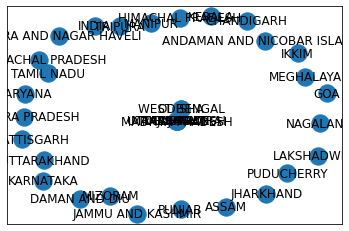

In [11]:
dfG=create()
TS=date(2020,7,1)
TE=date(2020,9,1)
for index,row in df.iterrows():                 
    x=row[20]
    x=x.strip('][').split(',')
    y=[]
    for i in range(1,len(x),2):
        var=x[i].strip(" '").upper()
        if var not in y:
            y.append(var)
        else:
            pass
    print(y)
    if "TELANGANA" in y:
        if "ANDHRA PRADESH" in y:
            y.remove("TELANGANA")
        else:
            dunno=y.index("TELANGANA")
            y[dunno]="ANDHRA PRADESH"


    temp=[]
    for i in y:
        try:
            temp.append(dic[i])
        except KeyError:
            if i =="TELANGANA":
                #temp.append(dic("ANDHRA PRADESH"))

                if "ANDHRA PRADESH" in y:
                    y.remove(i)
                else:
                    dunno=y.index("TELANGANA")
                    y[dunno]="ANDHRA PRADESH"
                    #print(y)
                    temp.append(dic["ANDHRA PRADESH"])
    lis=[sum(temp[(i):len(temp)]) for i in range(len(y))]

    capacity=checkruns_weight(row)
    for i in range(len(y)-1):
        for j in range(i+1,len(y)):
            if (i==0):
                den=lis[i]-temp[i]          #Temp is the mig inside of i and and lis is from i to len(y)
                test=y[i]
                test=temp[j]
                dfG[y[i]][y[j]]+=temp[j]*capacity/den
            else:
                den2=lis[i]-temp[i]
                mult1=capacity*temp[i]/lis[i]
                mult2=temp[j]/den2
                dfG[y[i]][y[j]]+=mult1*mult2

G=nx.from_pandas_adjacency(dfG)
nx.write_gml(G,str(TS)+"_2M.gml")
nx.draw_networkx(G)


In [7]:
dfG

,INDIA,ANDAMAN AND NICOBAR ISLANDS,ANDHRA PRADESH,ARUNACHAL PRADESH,ASSAM,BIHAR,CHANDIGARH,CHHATTISGARH,DADRA AND NAGAR HAVELI,DAMAN AND DIU,...,PUDUCHERRY,PUNJAB,RAJASTHAN,IKKIM,TAMIL NADU,TRIPURA,UTTAR PRADESH,UTTARAKHAND,WEST BENGAL,DELHI NCT
INDIA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ANDAMAN AND NICOBAR ISLANDS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ANDHRA PRADESH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ARUNACHAL PRADESH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ASSAM,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BIHAR,0,0,0,0,0,0,0,0,0,0,...,0,0,3854,0,0,0,40204,0,0,0
CHANDIGARH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CHHATTISGARH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DADRA AND NAGAR HAVELI,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DAMAN AND DIU,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
